In [1]:
### Package Imports ###
import numpy as np
import matplotlib.pyplot as plt
from integrators import *
from simulation_utilities import *
from barnes_hut_algo import octant_node
import matplotlib.patches as mpatches

import requests, re
import numpy as np
import pandas as pd
import datetime

In [2]:
# Calculate Metrics 
###############################################
### Comparing Various Time-Step Integrators ###
###############################################
# Initial Values
N = 3
v0=5.15

# Euler's Method
e_pos_agg, e_realism_metrics = run_simulation(N=3, T=10, dt=0.01, softening=0.1, G=1, normalize_momentum=False,
                                         initial_conditions={"mass":np.array([50,20,20]).astype(np.float16).reshape(3,1),
                                                             "pos":np.array([[0,0,0],[-2,0,0],[2,0,0]]).astype(np.float16),
                                                             "vel":np.array([[0,0,0],[0,v0,0],[0,-v0,0]]).astype(np.float16)},
                                         integrator=euler_integrator, use_BH=False, random_state=111,return_realism_metrics=True)


# Euler-Cromer
ec_pos_agg, ec_realism_metrics = run_simulation(N=3, T=10, dt=0.01, softening=0.1, G=1, normalize_momentum=False,
                                         initial_conditions={"mass":np.array([50,20,20]).astype(np.float16).reshape(3,1),
                                                             "pos":np.array([[0,0,0],[-2,0,0],[2,0,0]]).astype(np.float16),
                                                             "vel":np.array([[0,0,0],[0,v0,0],[0,-v0,0]]).astype(np.float16)},
                                         integrator=euler_cromer_integrator, use_BH=False, random_state=111, return_realism_metrics=True)
# Leap-Frog
lf_pos_agg, lf_realism_metrics = run_simulation(N=3, T=10, dt=0.01, softening=0.1, G=1, normalize_momentum=False,
                                         initial_conditions={"mass":np.array([50,20,20]).astype(np.float16).reshape(3,1),
                                                             "pos":np.array([[0,0,0],[-2,0,0],[2,0,0]]).astype(np.float16),
                                                             "vel":np.array([[0,0,0],[0,v0,0],[0,-v0,0]]).astype(np.float16)},
                                         integrator=leap_frog_integrator, use_BH=False, random_state=111,return_realism_metrics=True)

# Euler Richardson
er_pos_agg, er_realism_metrics = run_simulation(N=3, T=10, dt=0.01, softening=0.1, G=1, normalize_momentum=False,
                                         initial_conditions={"mass":np.array([50,20,20]).astype(np.float16).reshape(3,1),
                                                             "pos":np.array([[0,0,0],[-2,0,0],[2,0,0]]).astype(np.float16),
                                                             "vel":np.array([[0,0,0],[0,v0,0],[0,-v0,0]]).astype(np.float16)},
                                         integrator=euler_richardson_integrator, use_BH=False, random_state=111,return_realism_metrics=True)

# Verlet
v_pos_agg, v_realism_metrics = run_simulation(N=3, T=10, dt=0.01, softening=0.1, G=1, normalize_momentum=False,
                                         initial_conditions={"mass":np.array([50,20,20]).astype(np.float16).reshape(3,1),
                                                             "pos":np.array([[0,0,0],[-2,0,0],[2,0,0]]).astype(np.float16),
                                                             "vel":np.array([[0,0,0],[0,v0,0],[0,-v0,0]]).astype(np.float16)},
                                         integrator=verlet_integrator, use_BH=False, random_state=111,return_realism_metrics=True)

# Runge-Kutta 4
rk_pos_agg, rk_realism_metrics = run_simulation(N=3, T=10, dt=0.01, softening=0.1, G=1, normalize_momentum=False,
                                         initial_conditions={"mass":np.array([50,20,20]).astype(np.float16).reshape(3,1),
                                                             "pos":np.array([[0,0,0],[-2,0,0],[2,0,0]]).astype(np.float16),
                                                             "vel":np.array([[0,0,0],[0,v0,0],[0,-v0,0]]).astype(np.float16)},
                                         integrator=RK4_integrator, use_BH=False, random_state=111,return_realism_metrics=True)


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1980.11it/s]


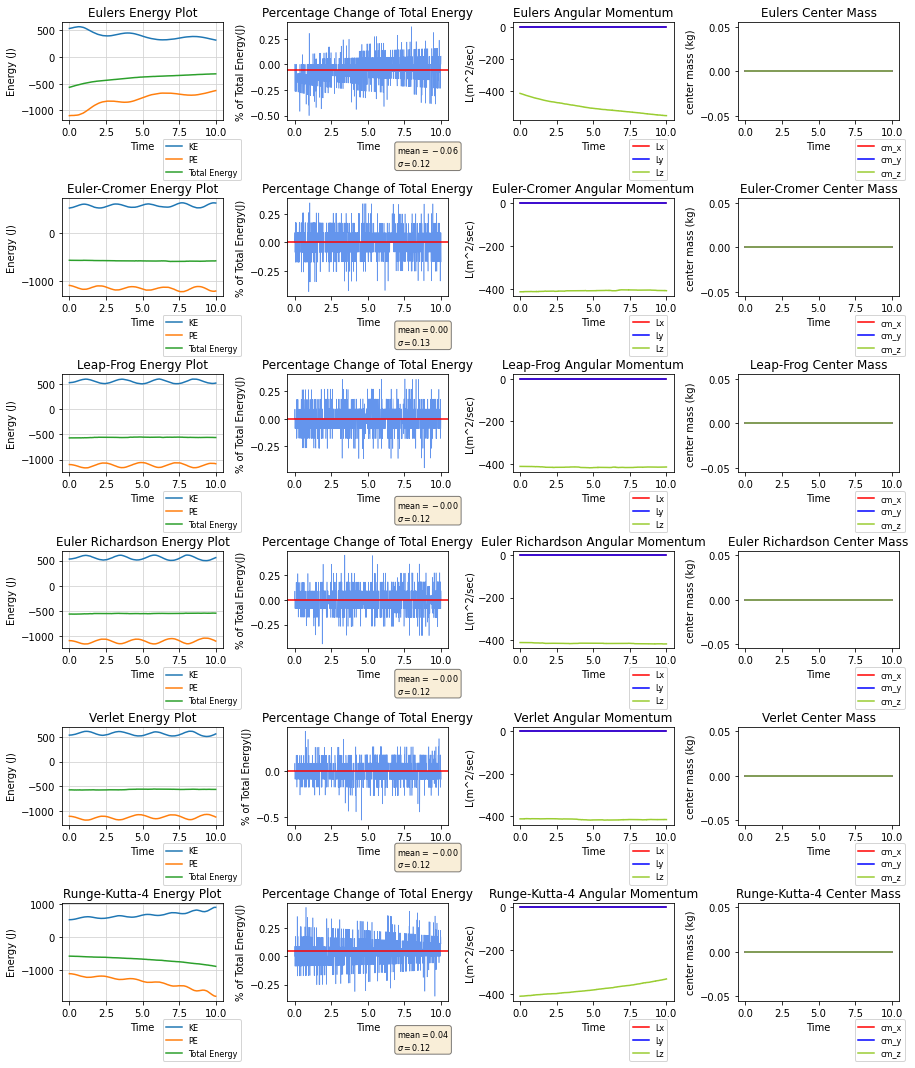

In [3]:
# Plot 
time_axis = np.arange(len(e_realism_metrics["KE"]))*0.01

# Comparison Plots
fig, ax = plt.subplots(6,4,figsize = (15,18))
fig.subplots_adjust(hspace = .8, wspace=.4)
ax = ax.flatten()
index = [i for i in range(24)]

methods_realism_metric = [e_realism_metrics, ec_realism_metrics, lf_realism_metrics, er_realism_metrics, v_realism_metrics, rk_realism_metrics]
methods_labels = ['Eulers', 'Euler-Cromer', 'Leap-Frog', 'Euler Richardson', 'Verlet', 'Runge-Kutta-4']
count = 0
for i in index:
    # Energy Plot
    if i in [0,4,8,12,16,20]:
        realism_metrics = methods_realism_metric[count]
        ax[i].plot(time_axis, realism_metrics['KE'] , label="KE",zorder=3)
        ax[i].plot(time_axis, realism_metrics['PE'], label="PE",zorder=3)
        ax[i].plot(time_axis,realism_metrics['Total_Energy'],label="Total Energy",zorder=3)
        ax[i].set_xlabel("Time")
        ax[i].set_ylabel("Energy (J)")
        ax[i].legend(loc='upper left', bbox_to_anchor=(0.6, -0.15),fontsize=8)
        ax[i].grid(color='lightgray',zorder=-3)
        ax[i].set_title(f"{methods_labels[count]} Energy Plot")  

    # Percentage Energy Change Plot
    elif i in [1,5,9,13,17,21]:
        PCTE_mean = np.mean(realism_metrics['Percentage_Change_of_Total_Energy'])
        PCTE_sd = np.std(realism_metrics['Percentage_Change_of_Total_Energy'])
        
        textstr = '\n'.join((r'$\mathrm{mean}=%.2f$' % (PCTE_mean, ), r'$\sigma=%.2f$' % (PCTE_sd, )))
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)        
        
        ax[i].plot(time_axis, realism_metrics['Percentage_Change_of_Total_Energy'],linewidth=.6,color = 'cornflowerblue')
        ax[i].axhline(PCTE_mean, color = 'red')
        ax[i].set_xlabel("Time")
        ax[i].set_ylabel('% of Total Energy(J)')
        ax[i].text(7,min(realism_metrics['Percentage_Change_of_Total_Energy'])-.28, textstr, fontsize=8,verticalalignment='top', bbox=props)
        ax[i].set_title('Percentage Change of Total Energy')

    # Angular Momentum Plot
    elif i in [2,6,10,14,18,22]:
        l_x = realism_metrics['Simulation_Angular_Momentum'][:,0]
        l_y = realism_metrics['Simulation_Angular_Momentum'][:,1]
        l_z = realism_metrics['Simulation_Angular_Momentum'][:,2]
        
        ax[i].plot(time_axis, l_x, color = 'red', label = 'Lx')
        ax[i].plot(time_axis, l_y, color = 'blue', label = 'Ly')
        ax[i].plot(time_axis, l_z, color = 'yellowgreen',label = 'Lz')
        ax[i].legend(loc='upper left', bbox_to_anchor=(0.7, -0.15),fontsize=8)
        ax[i].set_xlabel("Time")
        ax[i].set_ylabel('L(m^2/sec)')
        ax[i].set_title(f'{methods_labels[count]} Angular Momentum')

    # Center Mass Plot
    elif i in [3,7,11,15,19,23]:
        cm_x = realism_metrics['Center_Mass'][:,0]
        cm_y = realism_metrics['Center_Mass'][:,1]
        cm_z = realism_metrics['Center_Mass'][:,2]
        
        ax[i].plot(time_axis, cm_x, color = 'red', label = 'cm_x')
        ax[i].plot(time_axis, cm_y, color = 'blue', label = 'cm_y')
        ax[i].plot(time_axis, cm_z, color = 'yellowgreen',label = 'cm_z')
        ax[i].legend(loc='upper left', bbox_to_anchor=(0.7, -0.15),fontsize=8)
        ax[i].set_xlabel("Time")
        ax[i].set_ylabel('center mass (kg)')
        ax[i].set_title(f'{methods_labels[count]} Center Mass')
        count +=1
        
plt.show()

In [4]:
# Stability Measure 
"""
We will measure stability by using the Mean Square Error Formula
"""
def mse(A,B):
    return ((A - B)**2).mean()

e_L = e_realism_metrics['Simulation_Angular_Momentum']
ec_L = ec_realism_metrics['Simulation_Angular_Momentum']
lf_L = lf_realism_metrics['Simulation_Angular_Momentum']
er_L = er_realism_metrics['Simulation_Angular_Momentum']
v_L = v_realism_metrics['Simulation_Angular_Momentum']
rk_L = rk_realism_metrics['Simulation_Angular_Momentum']

e_total_mse = mse(e_L[:,0],ec_L[:,0].mean())+ mse(e_L[:,1],ec_L[:,1].mean()) + mse(e_L[:,2],e_L[:,2].mean())
ec_total_mse = mse(ec_L[:,0],ec_L[:,0].mean())+ mse(ec_L[:,1],ec_L[:,1].mean()) + mse(ec_L[:,2],ec_L[:,2].mean())
lf_total_mse = mse(lf_L[:,0],lf_L[:,0].mean())+ mse(lf_L[:,1],lf_L[:,1].mean()) + mse(lf_L[:,2],lf_L[:,2].mean())
er_total_mse = mse(er_L[:,0],er_L[:,0].mean())+ mse(er_L[:,1],er_L[:,1].mean()) + mse(er_L[:,2],er_L[:,2].mean())
v_total_mse = mse(v_L[:,0],v_L[:,0].mean())+ mse(v_L[:,1],v_L[:,1].mean()) + mse(v_L[:,2],v_L[:,2].mean())
rk_total_mse = mse(rk_L[:,0],rk_L[:,0].mean())+ mse(rk_L[:,1],rk_L[:,1].mean()) + mse(rk_L[:,2],rk_L[:,2].mean())

#geeksforgeeks.org/how-to-make-a-table-in-python/
# import module
from tabulate import tabulate

#'Eulers', 'Euler-Cromer', 'Leap-Frog', 'Euler Richardson', 'Verlet', 'Runge-Kutta-4'


# assign data
mydata = [
    ['Eulers', e_total_mse ],
    ['Euler-Cromer', round(ec_total_mse,2)],
    ['Leap-Frog', round(lf_total_mse,2)],
    ['Euler Richardson', round(er_total_mse,2)],
    ['Verlet', round(v_total_mse,2)],
    ['Runge-Kutta-4', round(rk_total_mse,2)]
]
 
# create header
head = ["  Integration Method", "Total MSE for  \n Angular Momentum"]
 
# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))

+------------------------+---------------------+
|   Integration Method   |     Total MSE for   |
|                        |    Angular Momentum |
+========================+=====================+
| Eulers                 |             1373.78 |
+------------------------+---------------------+
| Euler-Cromer           |                6.11 |
+------------------------+---------------------+
| Leap-Frog              |                2.53 |
+------------------------+---------------------+
| Euler Richardson       |                2.76 |
+------------------------+---------------------+
| Verlet                 |                5.09 |
+------------------------+---------------------+
| Runge-Kutta-4          |              510.11 |
+------------------------+---------------------+
